## This is the code for creating graphs for the results we achieved over 10 iterations

In [1]:
import pandas as pd

# Baseline Dataset
Baseline_data = {
    "Category": ["Average Successful Assignments", "Total Mean Reward", "Frames per Second", "Explained Variance", "Loss", "KL Divergence"],
    "Low Noise-Small Task DS": [63.44066667, 43.8, 178.4, 0.8987, 0.10827, 0.0196677154],
    "High Noise-Small Task DS": [56.4058, 24.2, 147.7, 0.908, 0.1313, 0.0179021951],
    "Low Noise-Big Task DS": [150.93475, 84.6, 95, 0.4556, 0.68398, 0.0188872038],
    "High Noise-Big Task DS": [139.30725, 41.6, 136, 0.4877, 0.37421, 0.018806785]
}
Baseline = pd.DataFrame(Baseline_data)

# Ridge Dataset
Ridge_data = {
    "Category": ["Average Successful Assignments", "Total Mean Reward", "Frames per Second", "Explained Variance", "Loss", "KL Divergence"],
    "Low Noise-Small Task DS": [91.57186667, 78.4, 94.8, 0.5988, 0.9163, 0.0088309958],
    "High Noise-Small Task DS": [88.37566667, 70.6, 95.8, 0.5461, 0.747, 0.0091214477],
    "Low Noise-Big Task DS": [224.2909167, 168.8, 121, 0.4843, 1.3174, 0.00666446349],
    "High Noise-Big Task DS": [208.80975, 139.6, 119.3, 0.5549, 1.415, 0.00641834961]
}
Ridge = pd.DataFrame(Ridge_data)

# SVR Dataset
SVR_data = {
    "Category": ["Average Successful Assignments", "Total Mean Reward", "Frames per Second", "Explained Variance", "Loss", "KL Divergence"],
    "Low Noise-Small Task DS": [88.49053333, 77, 95.2, 0.5007, 0.8003, 0.0093300543],
    "High Noise-Small Task DS": [86.72053333, 75, 95.3, 0.5897, 0.7997, 0.0091077913],
    "Low Noise-Big Task DS": [227.076, 168.8, 119.4, 0.47, 1.2868, 0.00675086852],
    "High Noise-Big Task DS": [210.58325, 137.2, 119.3, 0.5786, 1.34, 0.00678637478]
}
SVR = pd.DataFrame(SVR_data)

# KNN Dataset
KNN_data = {
    "Category": ["Average Successful Assignments", "Total Mean Reward", "Frames per Second", "Explained Variance", "Loss", "KL Divergence"],
    "Low Noise-Small Task DS": [88.92106667, 75, 94.3, 0.566, 0.8274, 0.0093253427],
    "High Noise-Small Task DS": [85.77966667, 71.4, 94.5, 0.5652, 0.7059, 0.0092004886],
    "Low Noise-Big Task DS": [223.0740833, 162, 109.636, 0.4714, 1.405, 0.00666203573],
    "High Noise-Big Task DS": [210.79475, 134.6, 117, 0.5791, 1.506, 0.00638500682]
}
KNN = pd.DataFrame(KNN_data)




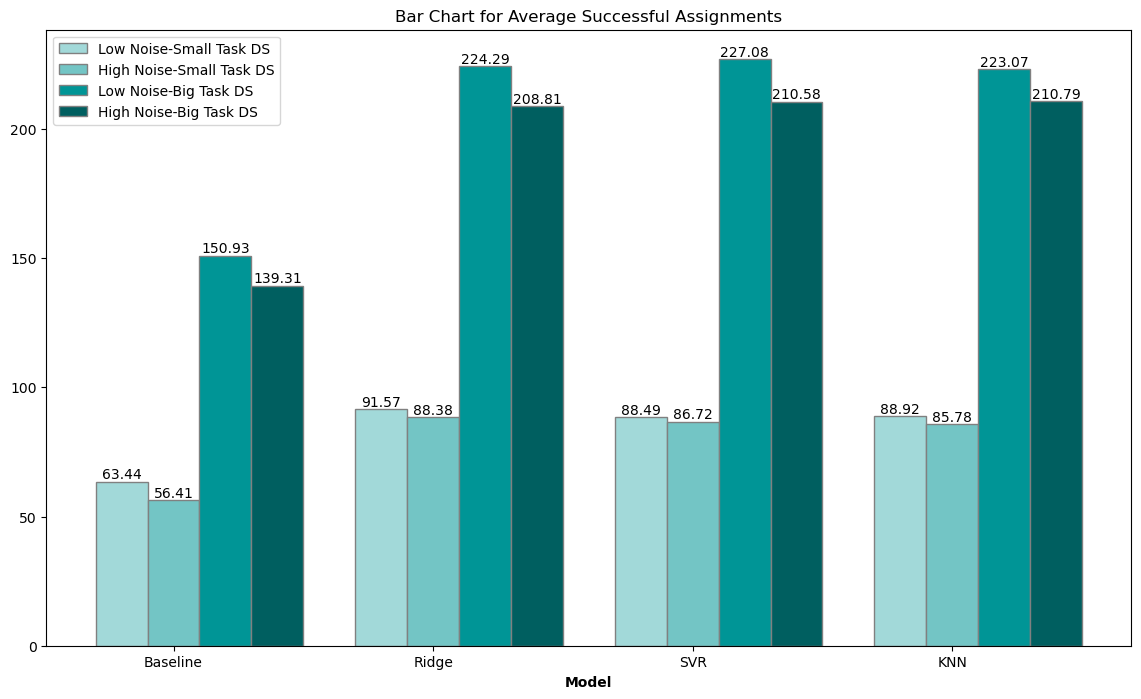

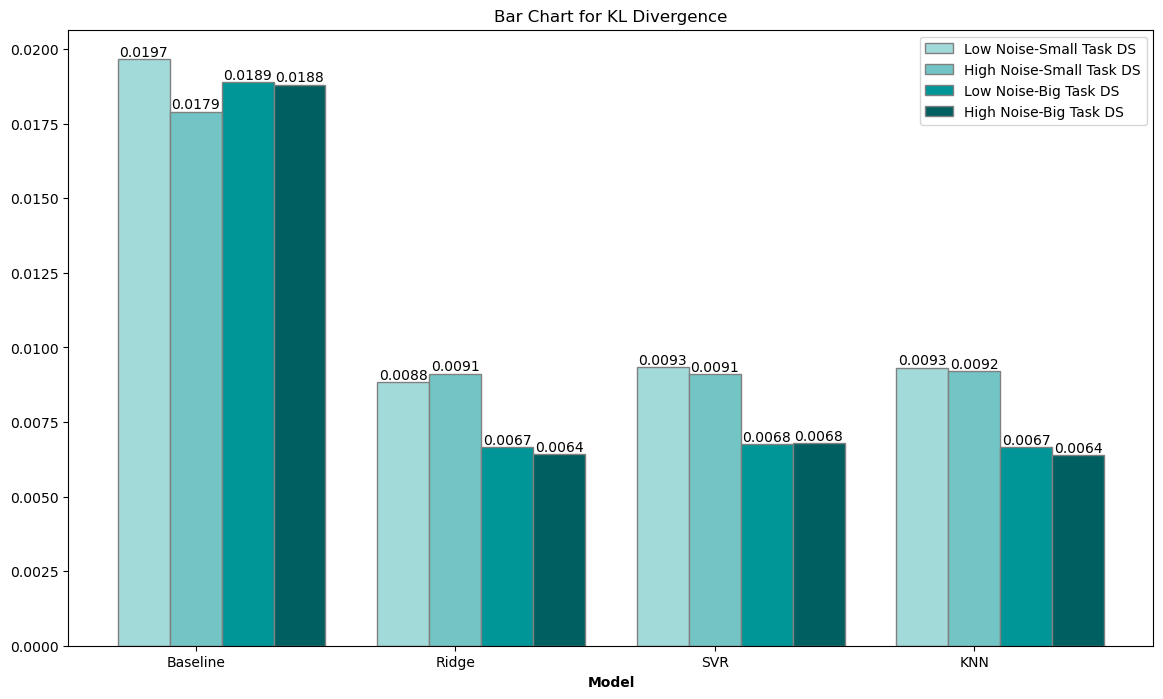

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot bar charts for each metric
def plot_bar_chart(dataframes, metric, title, colors):
    # Define the labels and colors for the clusters
    labels = ['Baseline', 'Ridge', 'SVR', 'KNN']
    scenarios = ["Low Noise-Small Task DS", "High Noise-Small Task DS", "Low Noise-Big Task DS", "High Noise-Big Task DS"]
    color_map = {
        scenarios[0]: colors[0],
        scenarios[1]: colors[1],
        scenarios[2]: colors[2],
        scenarios[3]: colors[3]
    }

    # Number of datasets
    n_datasets = len(dataframes)
    # Width of a bar
    width = 0.2
    
    # Set position of bar on X axis
    r = np.arange(n_datasets)

    fig, ax = plt.subplots(figsize=(14, 8))

    for i, scenario in enumerate(scenarios):
        means = [df[scenario].loc[df['Category'] == metric].iloc[0] for df in dataframes]
        
        # Format the display of the bar labels
        if metric == "Average Successful Assignments":
            bar_labels = [f'{x:.2f}' for x in means]
        elif metric == "KL Divergence":
            bar_labels = [f'{x:.4f}' for x in means]
        else:
            bar_labels = [f'{x}' for x in means]
        
        # Create bars for each dataset
        bars = ax.bar(r, means, color=color_map[scenario], width=width, edgecolor='grey', label=scenario)
        
        # Place a label above each bar
        for bar, label in zip(bars, bar_labels):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height, label, ha='center', va='bottom')

        # Move the position for the next dataset's bars
        r = [x + width for x in r]

    # Add xticks on the middle of the group bars
    ax.set_xlabel('Model', fontweight='bold')
    ax.set_xticks([r + width for r in range(len(r))])
    ax.set_xticklabels(labels)
    ax.set_title(title)

    # Create legend & Show graphic
    ax.legend()
    plt.show()

# Define the colors for the bars
colors = ['#A2D9D9', '#73C5C5', '#009596', '#005F60'] # Light blue, Darker blue, Light orange, Darker orange

# Plot bar charts for the specified metrics
plot_bar_chart(dataframes=[Baseline, Ridge, SVR, KNN], metric="Average Successful Assignments", 
               title="Bar Chart for Average Successful Assignments", colors=colors)

plot_bar_chart(dataframes=[Baseline, Ridge, SVR, KNN], metric="KL Divergence", 
               title="Bar Chart for KL Divergence", colors=colors)


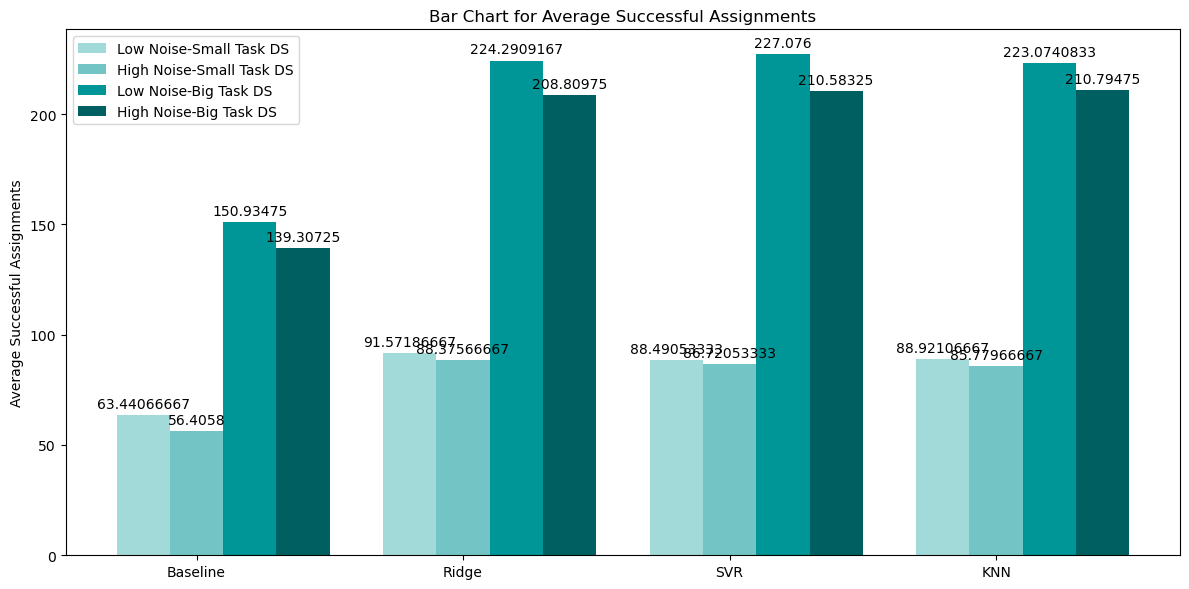

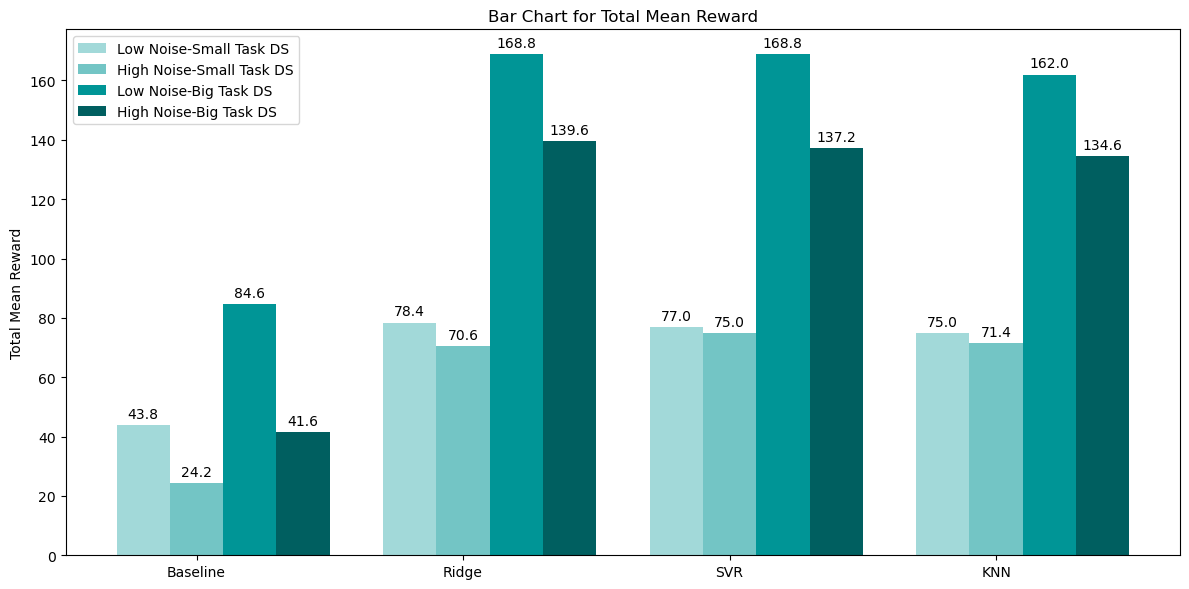

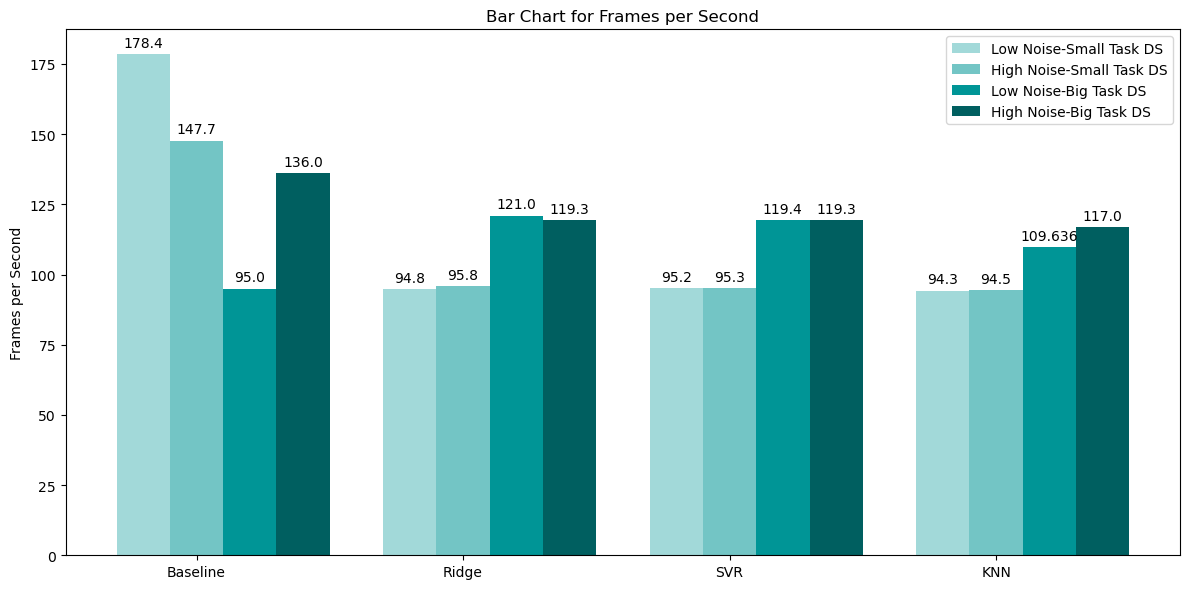

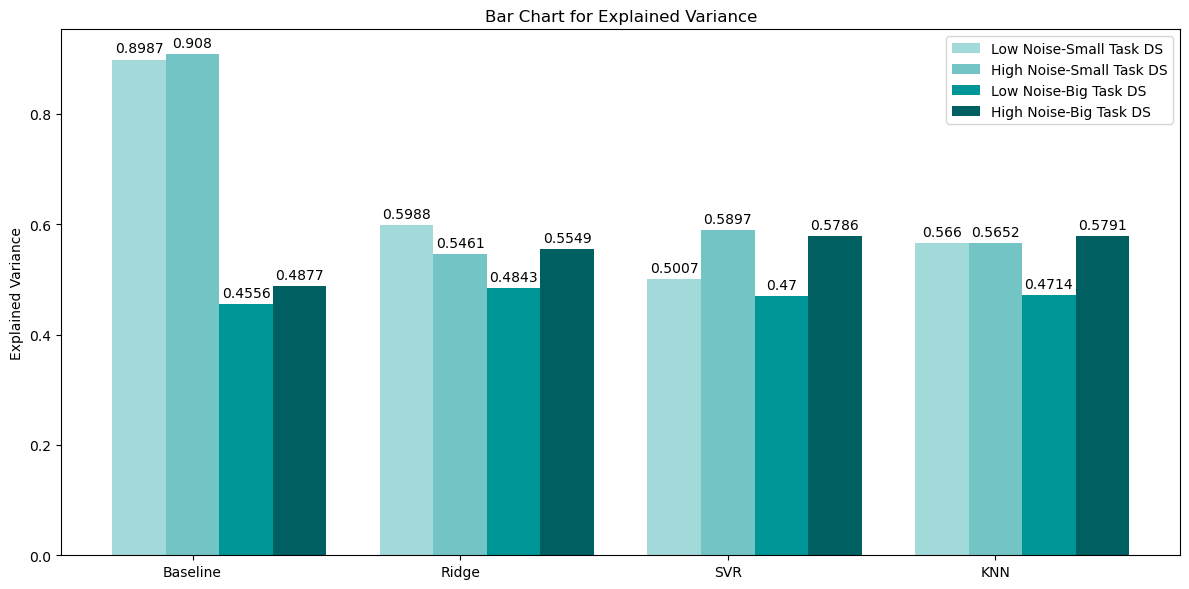

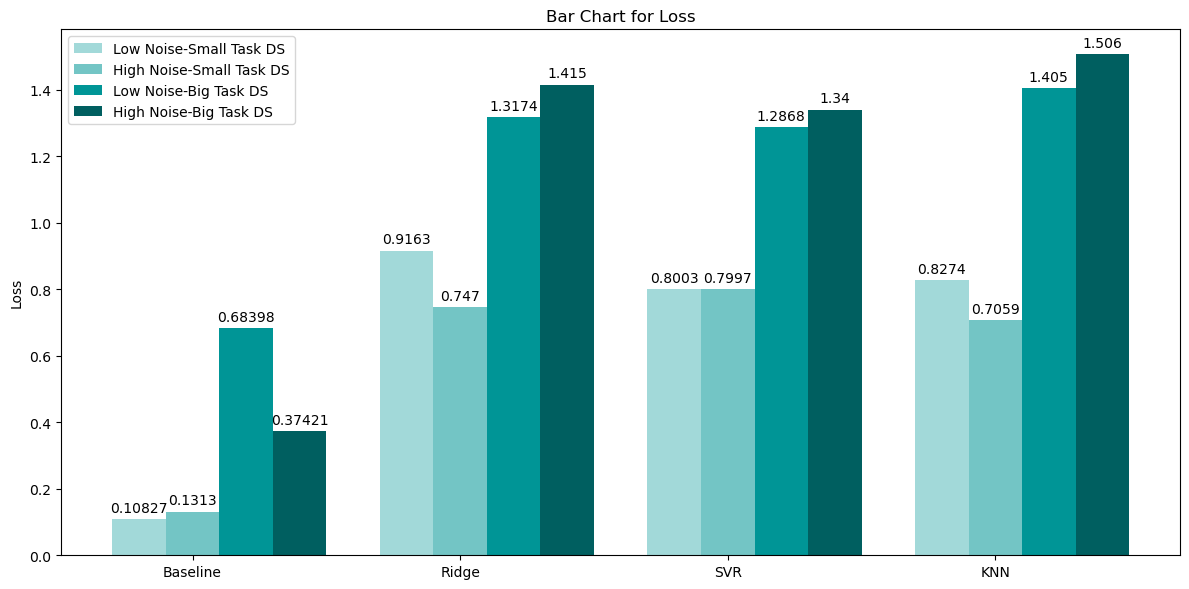

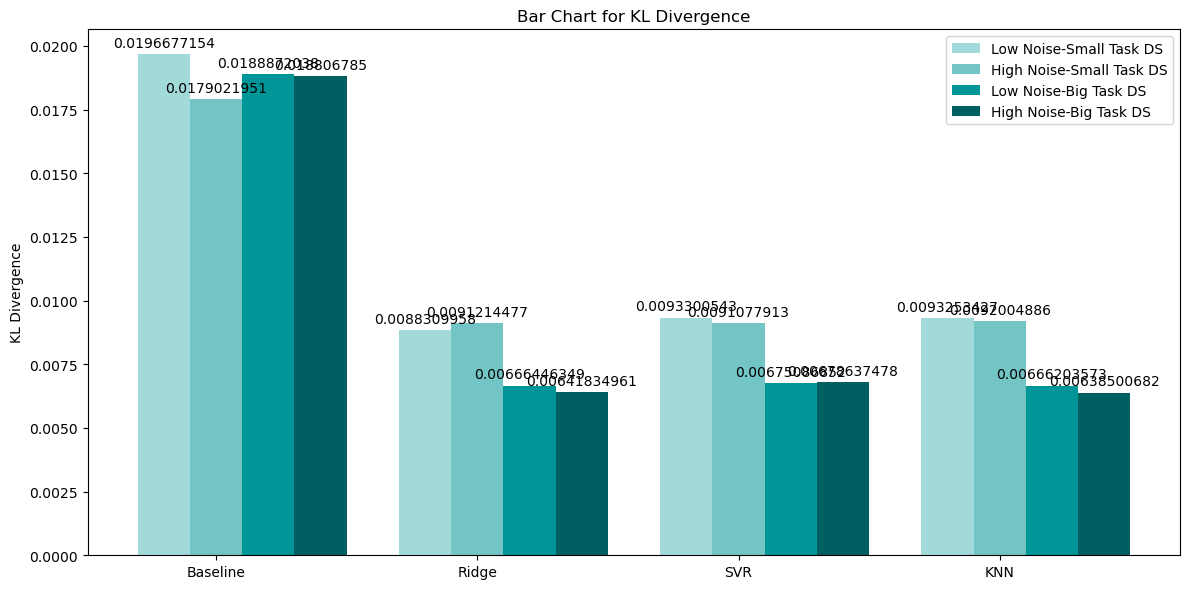

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Create a function to plot bar charts for each category
def plot_bar_chart(dataframes, category, title, colors):
    # Define the labels for the clusters
    labels = ['Baseline', 'Ridge', 'SVR', 'KNN']
    
    # Define the position of the bars
    x = np.arange(len(labels))  
    width = 0.2  # the width of the bars
    
    fig, ax = plt.subplots(figsize=(12, 6))
    rects = []
    scenarios = ["Low Noise-Small Task DS", "High Noise-Small Task DS", "Low Noise-Big Task DS", "High Noise-Big Task DS"]
    
    # Create a bar for each scenario within each cluster
    for i, scenario in enumerate(scenarios):
        values = [df.loc[df['Category'] == category, scenario].values[0] for df in dataframes]
        rects.append(ax.bar(x + i*width, values, width, label=scenario, color=colors[i]))
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(category)
    ax.set_title(title)
    ax.set_xticks(x + width)
    ax.set_xticklabels(labels)
    ax.legend()
    
    # Function to attach a text label above each bar, displaying its height
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    
    # Call the function to attach labels
    for rect in rects:
        autolabel(rect)

    fig.tight_layout()

    plt.show()

# Create the bar charts for each category
categories = ["Average Successful Assignments", "Total Mean Reward", "Frames per Second", "Explained Variance", "Loss", "KL Divergence"]
colors = ['#A2D9D9', '#73C5C5', '#009596', '#005F60']  # Colors for the bars
dataframes = [Baseline, Ridge, SVR, KNN]

# Plotting all categories
for category in categories:
    plot_bar_chart(dataframes, category, f'Bar Chart for {category}', colors)


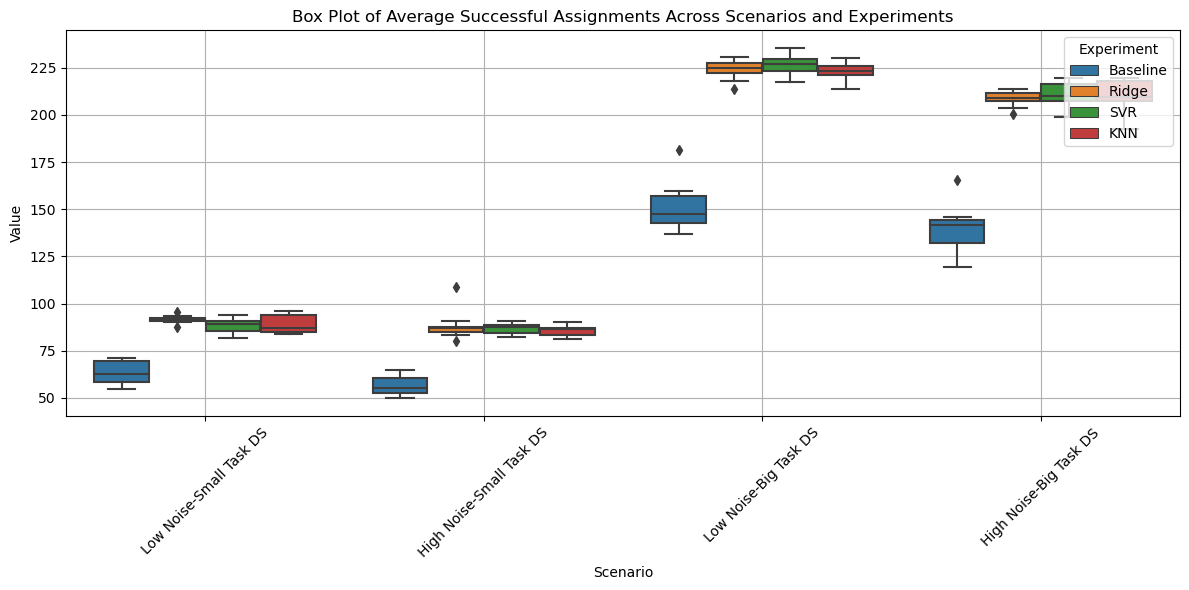

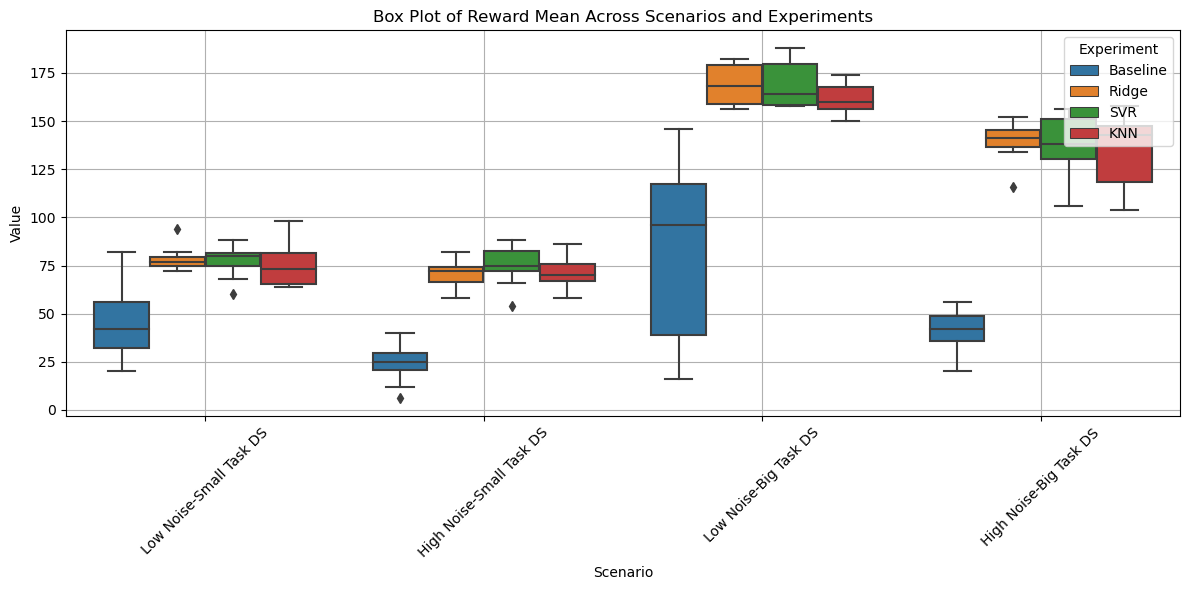

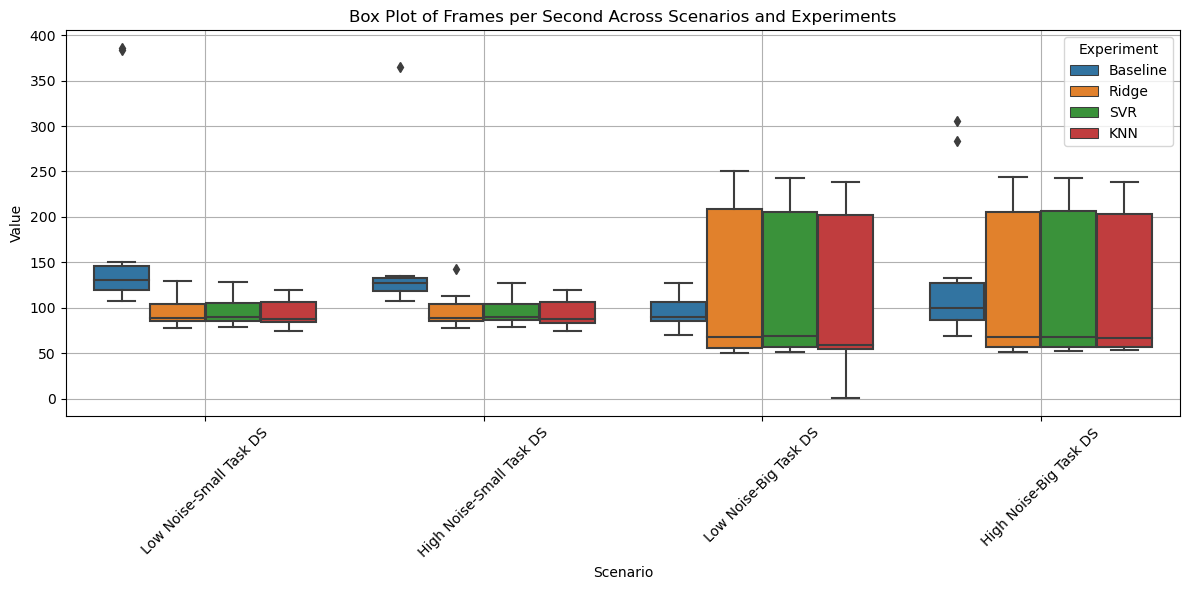

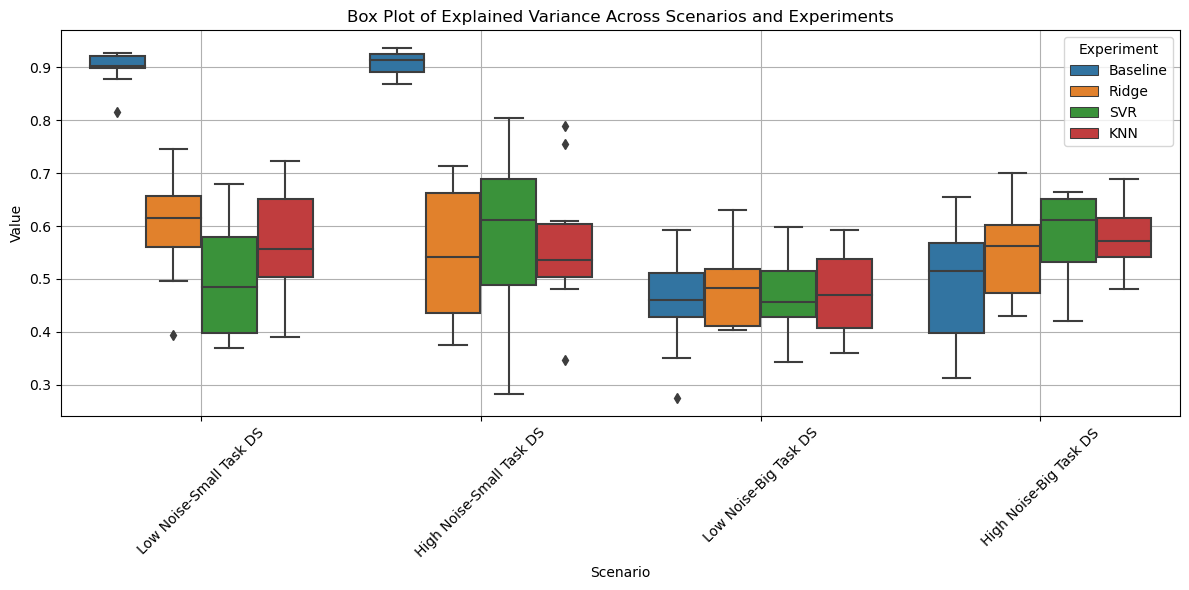

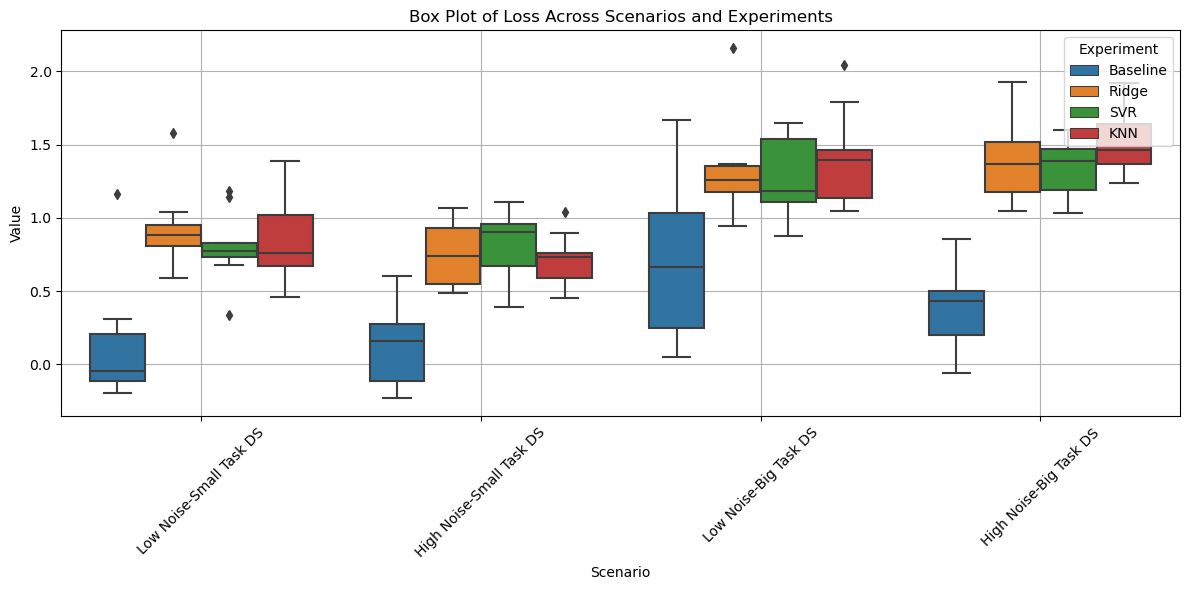

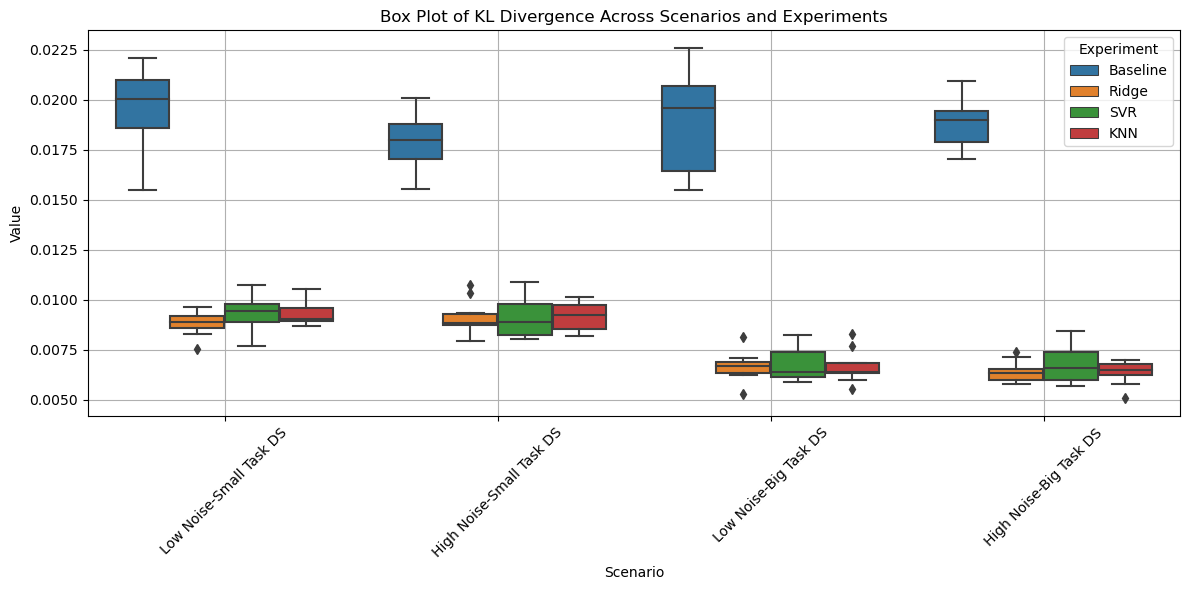

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to load data from a CSV file
def load_data(file_name):
    return pd.read_csv(file_name)

# Load data from each CSV
baseline_data = load_data('BaselineResults.csv')
ridge_data = load_data('RidgeResults.csv')
svr_data = load_data('SVRResults.csv')
knn_data = load_data('KNNResults.csv')

# Concatenate all datasets with a new column 'Experiment' to distinguish them
baseline_data['Experiment'] = 'Baseline'
ridge_data['Experiment'] = 'Ridge'
svr_data['Experiment'] = 'SVR'
knn_data['Experiment'] = 'KNN'

# Combine all into one DataFrame
all_data = pd.concat([baseline_data, ridge_data, svr_data, knn_data], ignore_index=True)

# Melt the DataFrame to format it for seaborn's boxplot
melted_data = all_data.melt(id_vars=['Scenario', 'Metric', 'Experiment'], var_name='Run', value_name='Value')

# Filter data for each metric and create a box plot
for metric in ['Average Successful Assignments', 'Reward Mean', 'Frames per Second', 'Explained Variance', 'Loss', 'KL Divergence']:
    plt.figure(figsize=(12, 6))
    ax = sns.boxplot(data=melted_data[melted_data['Metric'] == metric], x='Scenario', y='Value', hue='Experiment')
    plt.title(f'Box Plot of {metric} Across Scenarios and Experiments')
    plt.xticks(rotation=45)
    plt.legend(title='Experiment', loc='upper right')
    plt.grid(True)  # Enable grid
    ax.set_axisbelow(True)  # Ensure grid is behind the plot elements
    plt.tight_layout()
    plt.savefig(f'{metric}_boxplot.png')  # Save the plot as a PNG file
    plt.show()


In [3]:
# After loading each dataset
print(svr_data.head())

# After concatenating the datasets
print(all_data.head())

# After melting the data
print(melted_data.head())


                  Scenario                           Metric       run1  \
0  Low Noise-Small Task DS   Average Successful Assignments  81.592667   
1  Low Noise-Small Task DS                      Reward Mean  68.000000   
2  Low Noise-Small Task DS                Frames per Second  79.000000   
3  Low Noise-Small Task DS               Explained Variance   0.369000   
4  Low Noise-Small Task DS                             Loss   0.678000   

     run2    run3    run4       run5       run6       run7        run8  \
0  88.016  89.200  94.190  84.550667  92.562667  91.370667   89.476667   
1  76.000  60.000  80.000  80.000000  82.000000  82.000000   74.000000   
2  79.000  89.000  93.000  85.000000  87.000000  90.000000  109.000000   
3   0.679   0.574   0.403   0.531000   0.437000   0.581000    0.653000   
4   1.180   0.757   0.723   0.786000   0.828000   0.755000    1.140000   

      run9    run10 Experiment  
0   89.604   84.342        SVR  
1   80.000   88.000        SVR  
2  113.000 

## Box Plot for Training Data

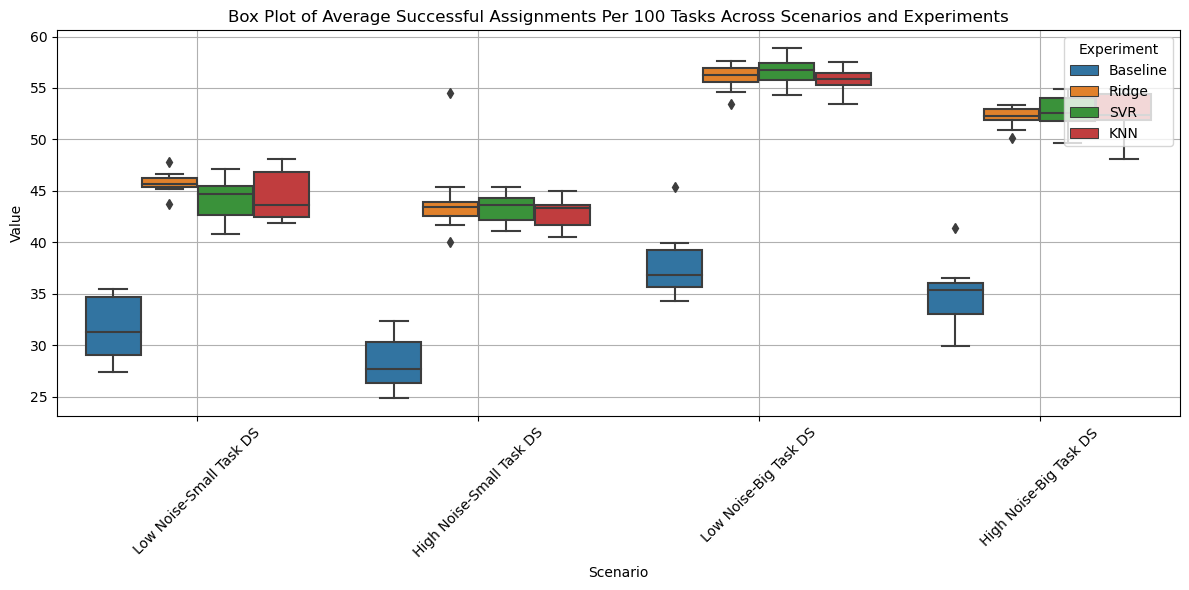

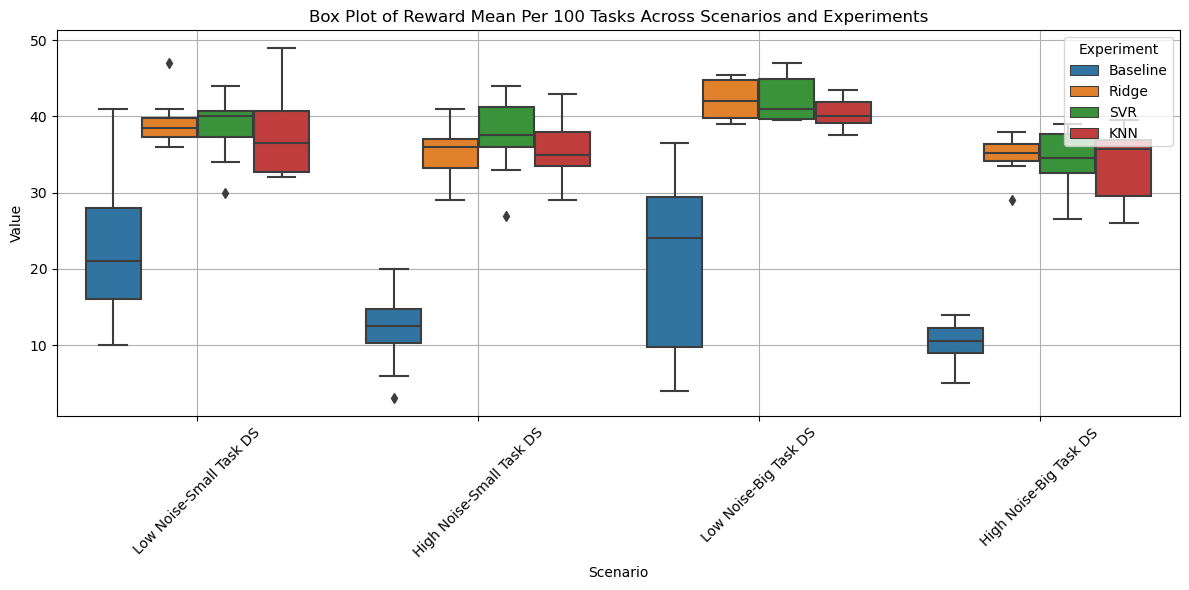

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to load data from a CSV file
def load_data(file_name):
    return pd.read_csv(file_name)

# Load data from each CSV
baseline_data = load_data('BaselineResults.csv')
ridge_data = load_data('RidgeResults.csv')
svr_data = load_data('SVRResults.csv')
knn_data = load_data('KNNResults.csv')

# Concatenate all datasets with a new column 'Experiment' to distinguish them
baseline_data['Experiment'] = 'Baseline'
ridge_data['Experiment'] = 'Ridge'
svr_data['Experiment'] = 'SVR'
knn_data['Experiment'] = 'KNN'

# Combine all into one DataFrame
all_data = pd.concat([baseline_data, ridge_data, svr_data, knn_data], ignore_index=True)

# Define a function to scale the metrics per 100 tasks
def scale_metrics(row):
    if 'Small Task' in row['Scenario']:
        scale_factor = 200 / 100  # since it's per 200 tasks, we scale it to per 100 tasks
    else:
        scale_factor = 400 / 100  # since it's per 400 tasks, we scale it to per 100 tasks
    if row['Metric'] in ['Average Successful Assignments', 'Reward Mean']:
        return row['Value'] / scale_factor
    return row['Value']

# Melt the DataFrame to format it for seaborn's boxplot and apply scaling
all_data = all_data.melt(id_vars=['Scenario', 'Metric', 'Experiment'], var_name='Run', value_name='Value')
all_data['Value'] = all_data.apply(scale_metrics, axis=1)

# Filter and plot specific metrics
for metric in ['Average Successful Assignments', 'Reward Mean']:
    plt.figure(figsize=(12, 6))
    ax = sns.boxplot(data=all_data[all_data['Metric'] == metric], x='Scenario', y='Value', hue='Experiment')
    plt.title(f'Box Plot of {metric} Per 100 Tasks Across Scenarios and Experiments')
    plt.xticks(rotation=45)
    plt.legend(title='Experiment', loc='upper right')
    plt.grid(True)
    ax.set_axisbelow(True)
    plt.tight_layout()
    plt.savefig(f'{metric}_per_100_tasks_boxplot.png')
    plt.show()


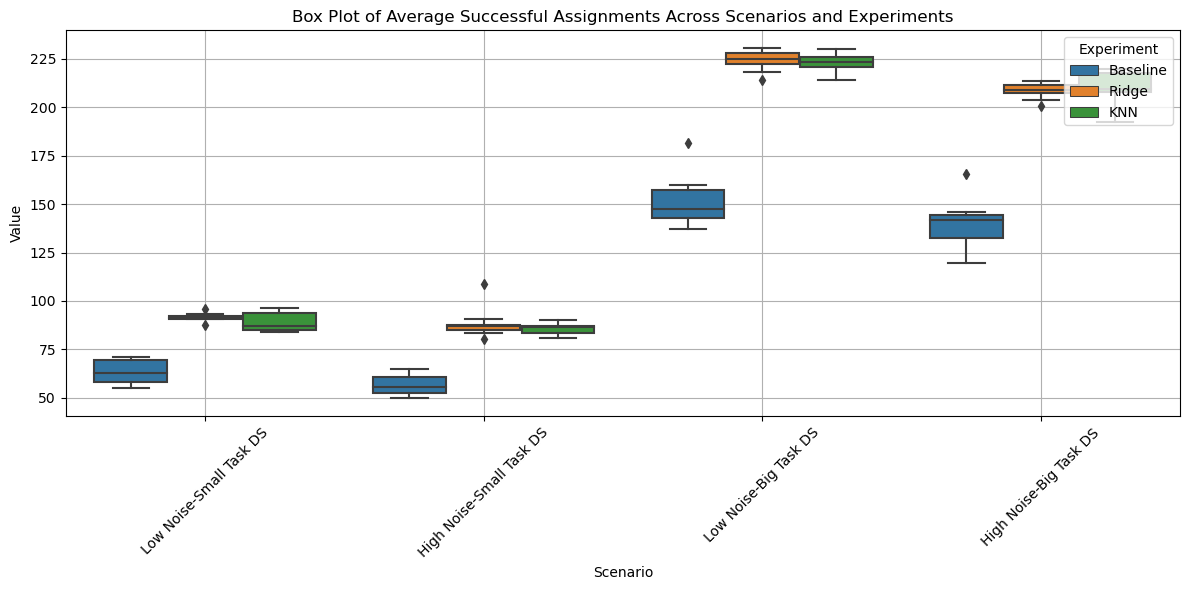

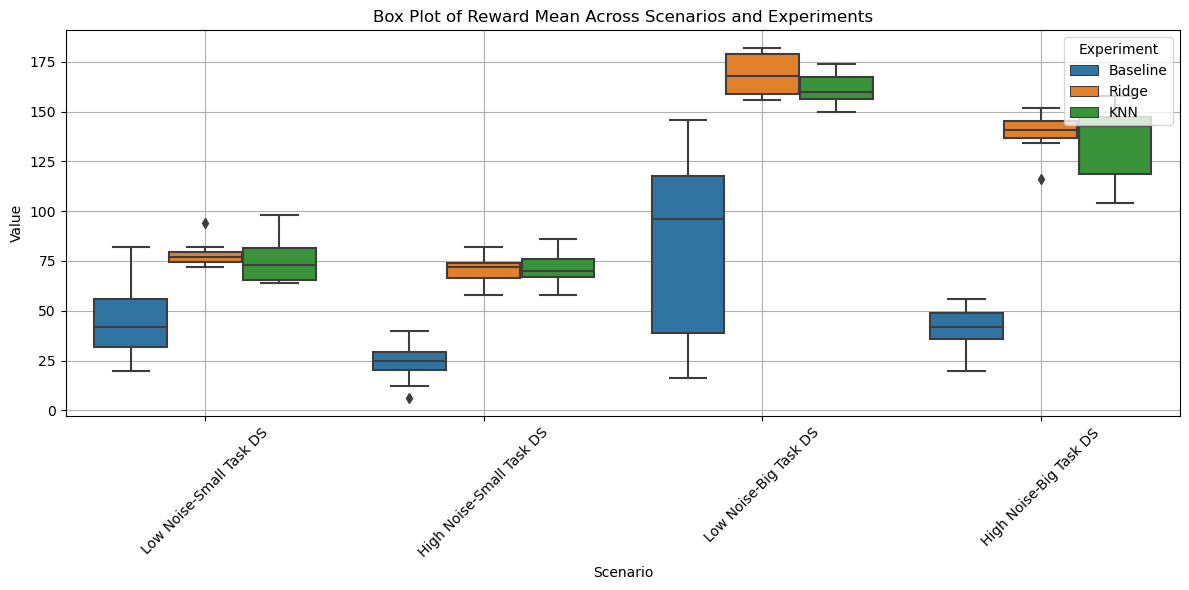

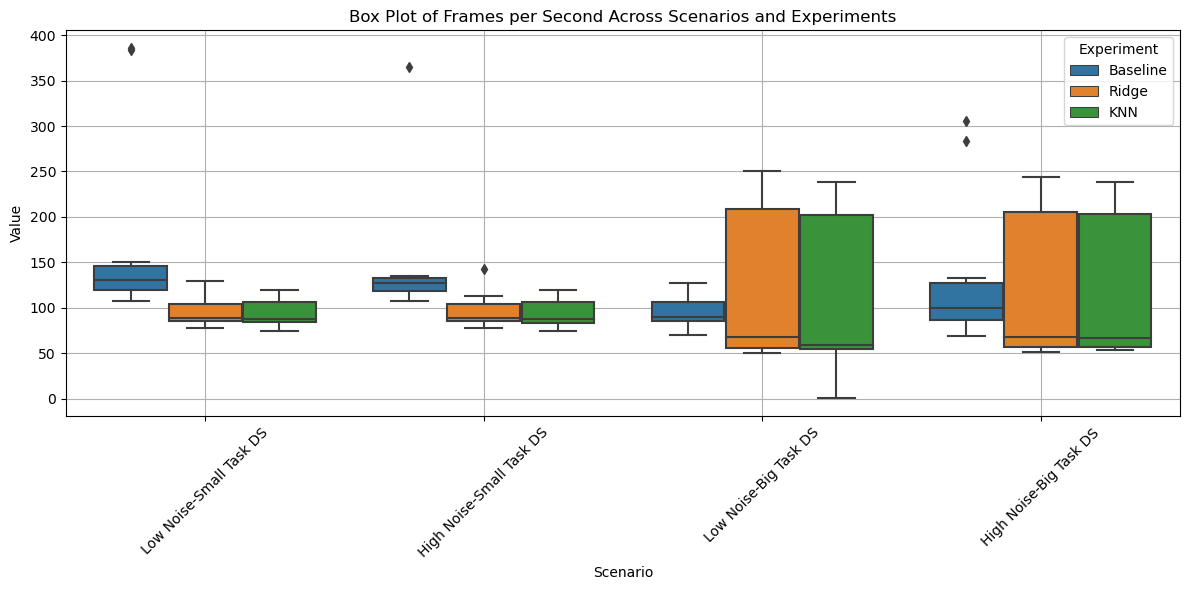

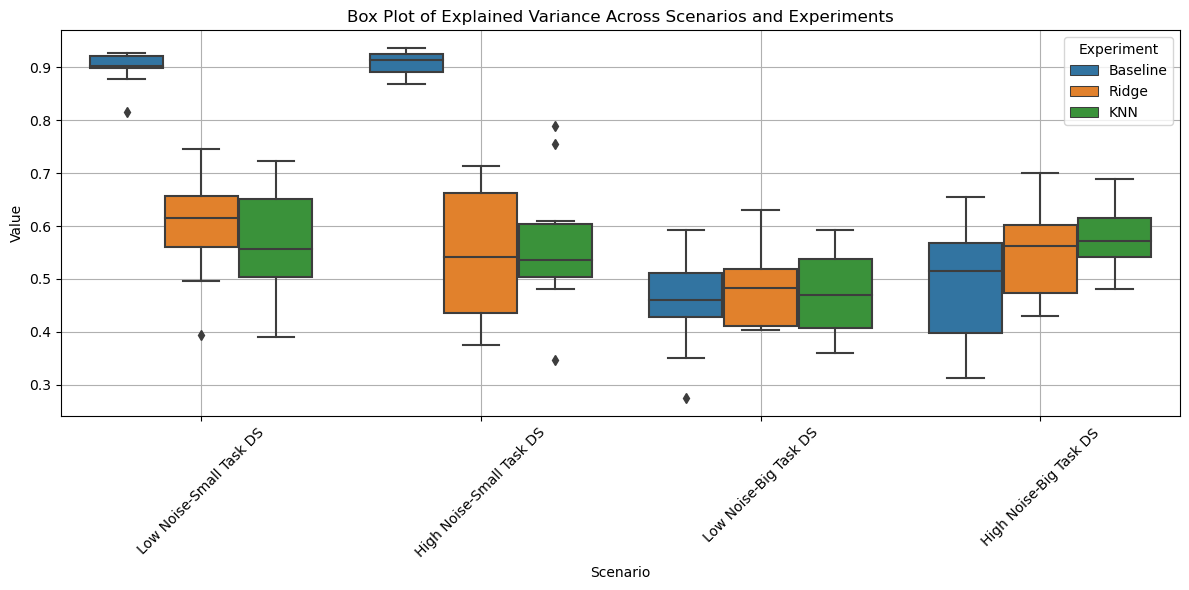

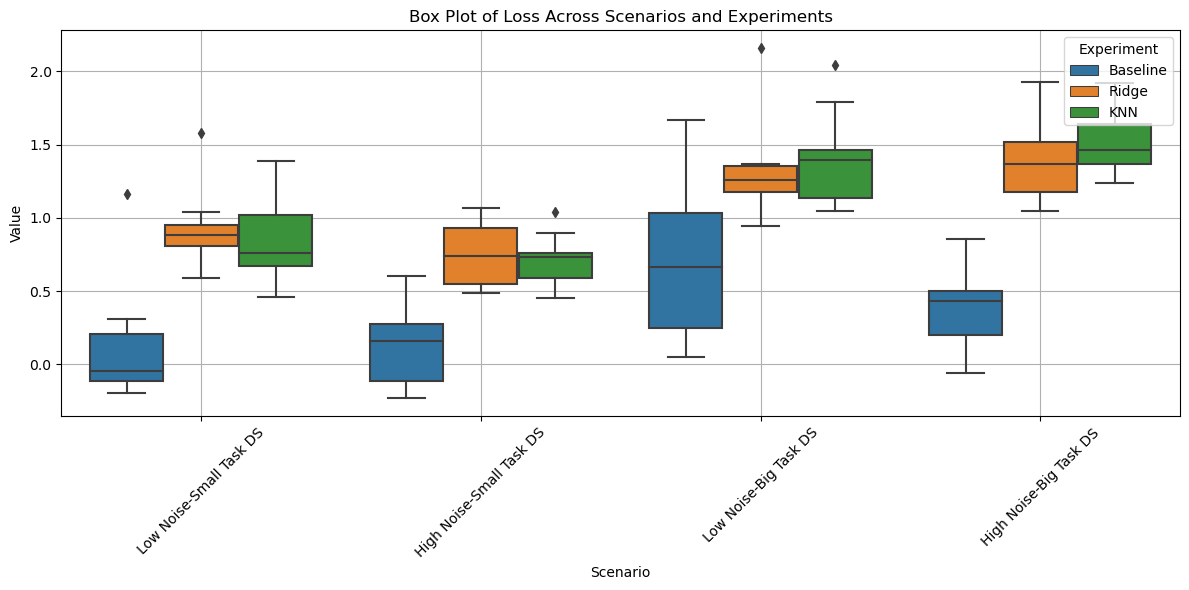

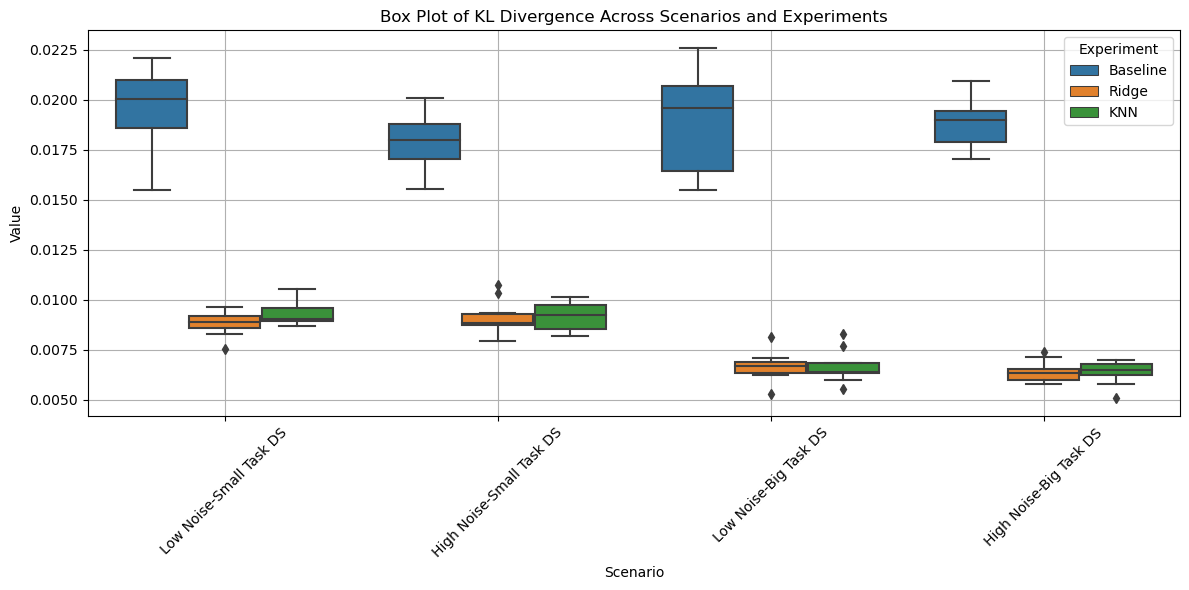

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to load data from a CSV file
def load_data(file_name):
    return pd.read_csv(file_name)

# Load data from each CSV
baseline_data = load_data('BaselineResults.csv')
ridge_data = load_data('RidgeResults.csv')
svr_data = load_data('SVRResults.csv')
knn_data = load_data('KNNResults.csv')

# Concatenate all datasets with a new column 'Experiment' to distinguish them
baseline_data['Experiment'] = 'Baseline'
ridge_data['Experiment'] = 'Ridge'
svr_data['Experiment'] = 'SVR'
knn_data['Experiment'] = 'KNN'

# Combine all into one DataFrame
all_data = pd.concat([baseline_data, ridge_data, svr_data, knn_data], ignore_index=True)

# Melt the DataFrame to format it for seaborn's boxplot
melted_data = all_data.melt(id_vars=['Scenario', 'Metric', 'Experiment'], var_name='Run', value_name='Value')

# Filter data for each metric and create a box plot
for metric in ['Average Successful Assignments', 'Reward Mean', 'Frames per Second', 'Explained Variance', 'Loss', 'KL Divergence']:
    plt.figure(figsize=(12, 6))
    ax = sns.boxplot(data=melted_data[melted_data['Metric'] == metric], x='Scenario', y='Value', hue='Experiment')
    plt.title(f'Box Plot of {metric} Across Scenarios and Experiments')
    plt.xticks(rotation=45)
    plt.legend(title='Experiment', loc='upper right')
    plt.grid(True)  # Enable grid
    ax.set_axisbelow(True)  # Ensure grid is behind the plot elements
    plt.tight_layout()
    plt.savefig(f'{metric}_boxplot.png')  # Save the plot as a PNG file
    plt.show()


In [5]:
try:
    svr_data = load_data('SVRResults.csv')
except pd.errors.EmptyDataError:
    print("Error: 'SVRResults.csv' is empty or doesn't exist. Please check the file.")
    # Handle the error or exit the program
    # For example, you can exit the script
    import sys
    sys.exit("Data loading halted due to the above error.")


# Graphs for Test(unseen) Data

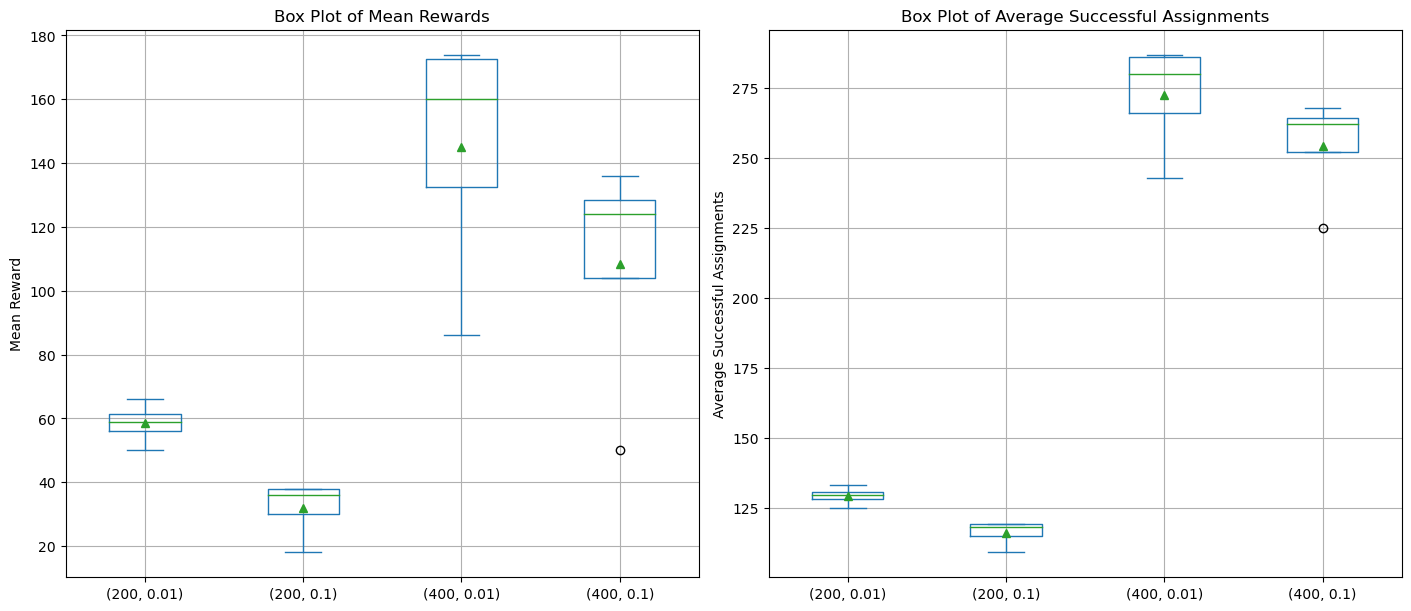

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Data preparation
data = {
    'Model': [],
    'TaskCount': [],
    'NoiseLevel': [],
    'MeanReward': [],
    'AvgSuccessAssignments': []
}

# Adding Baseline data
data['Model'].extend(['Baseline']*4)
data['TaskCount'].extend([200]*2 + [400]*2)
data['NoiseLevel'].extend([0.01, 0.1]*2)
data['MeanReward'].extend([50.0, 18.0, 86.0, 50.0])
data['AvgSuccessAssignments'].extend([125.0, 109.0, 243.0, 225.0])

# Adding Ridge data
data['Model'].extend(['Ridge']*4)
data['TaskCount'].extend([200]*2 + [400]*2)
data['NoiseLevel'].extend([0.01, 0.1]*2)
data['MeanReward'].extend([58.0, 38.0, 174.0, 122.0])
data['AvgSuccessAssignments'].extend([129.0, 119.0, 287.0, 261.0])

# Adding SVR data
data['Model'].extend(['SVR']*4)
data['TaskCount'].extend([200]*2 + [400]*2)
data['NoiseLevel'].extend([0.01, 0.1]*2)
data['MeanReward'].extend([60.0, 38.0, 148.0, 126.0])
data['AvgSuccessAssignments'].extend([130.0, 119.0, 274.0, 263.0])

# Adding KNN data
data['Model'].extend(['KNN']*4)
data['TaskCount'].extend([200]*2 + [400]*2)
data['NoiseLevel'].extend([0.01, 0.1]*2)
data['MeanReward'].extend([66.0, 34.0, 172.0, 136.0])
data['AvgSuccessAssignments'].extend([133.0, 117.0, 286.0, 268.0])

# Convert to DataFrame
df = pd.DataFrame(data)

# Plotting the box plots
fig, ax = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

# Mean Reward Boxplot
df_mean_reward = df.pivot_table(index=['Model'], columns=['TaskCount', 'NoiseLevel'], values='MeanReward', aggfunc='sum')
df_mean_reward.plot(kind='box', ax=ax[0], showmeans=True)
ax[0].set_title('Box Plot of Mean Rewards')
ax[0].set_ylabel('Mean Reward')
ax[0].grid(True)

# Average Successful Assignments Boxplot
df_avg_assignments = df.pivot_table(index=['Model'], columns=['TaskCount', 'NoiseLevel'], values='AvgSuccessAssignments', aggfunc='sum')
df_avg_assignments.plot(kind='box', ax=ax[1], showmeans=True)
ax[1].set_title('Box Plot of Average Successful Assignments')
ax[1].set_ylabel('Average Successful Assignments')
ax[1].grid(True)

plt.show()



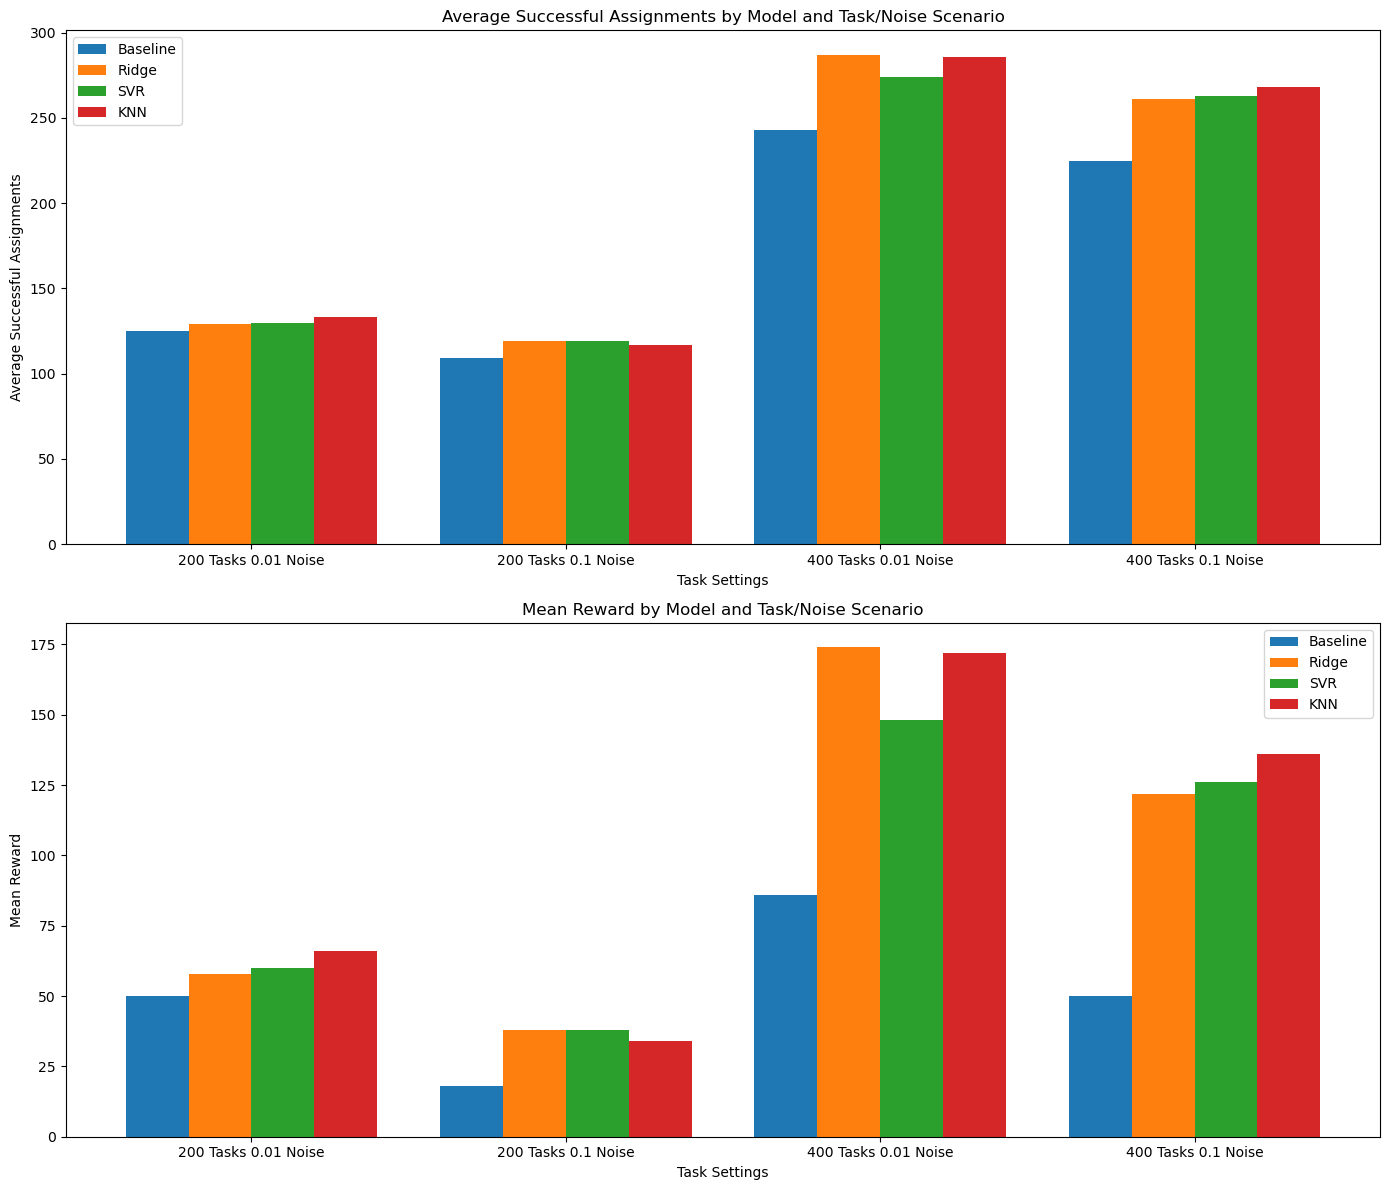

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Baseline', 'Ridge', 'SVR', 'KNN']
task_settings = ['200 Tasks 0.01 Noise', '200 Tasks 0.1 Noise', '400 Tasks 0.01 Noise', '400 Tasks 0.1 Noise']

# Mean Rewards and Average Successful Assignments by model and task/noise setting
mean_rewards = {
    'Baseline': [50.0, 18.0, 86.0, 50.0],
    'Ridge': [58.0, 38.0, 174.0, 122.0],
    'SVR': [60.0, 38.0, 148.0, 126.0],
    'KNN': [66.0, 34.0, 172.0, 136.0]
}

avg_assignments = {
    'Baseline': [125.0, 109.0, 243.0, 225.0],
    'Ridge': [129.0, 119.0, 287.0, 261.0],
    'SVR': [130.0, 119.0, 274.0, 263.0],
    'KNN': [133.0, 117.0, 286.0, 268.0]
}

# Function to create a bar chart
def create_bar_chart(data, title, ylabel, fig_ax):
    n_groups = len(data[models[0]])  # number of groups
    index = np.arange(n_groups)  # group positions
    bar_width = 0.2  # width of bars

    for i, model in enumerate(models):
        fig_ax.bar(index + i * bar_width, data[model], bar_width, label=model)

    fig_ax.set_xlabel('Task Settings')
    fig_ax.set_ylabel(ylabel)
    fig_ax.set_title(title)
    fig_ax.set_xticks(index + bar_width * 1.5)
    fig_ax.set_xticklabels(task_settings)
    fig_ax.legend()

# Create figure and axes
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# Create bar charts
create_bar_chart(avg_assignments, 'Average Successful Assignments by Model and Task/Noise Scenario', 'Average Successful Assignments', ax[0])
create_bar_chart(mean_rewards, 'Mean Reward by Model and Task/Noise Scenario', 'Mean Reward', ax[1])

# Adjust layout
plt.tight_layout()
plt.show()

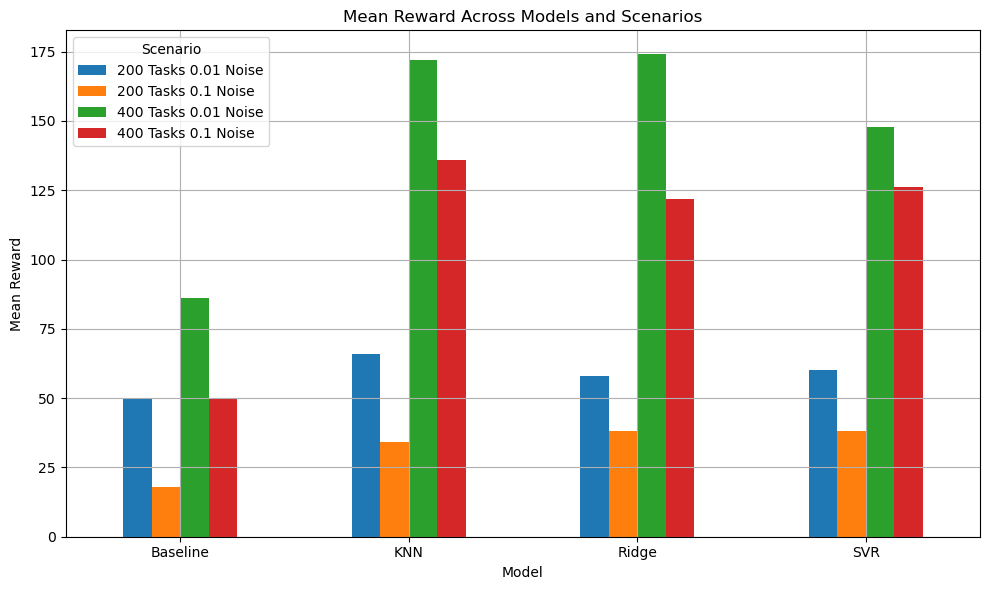

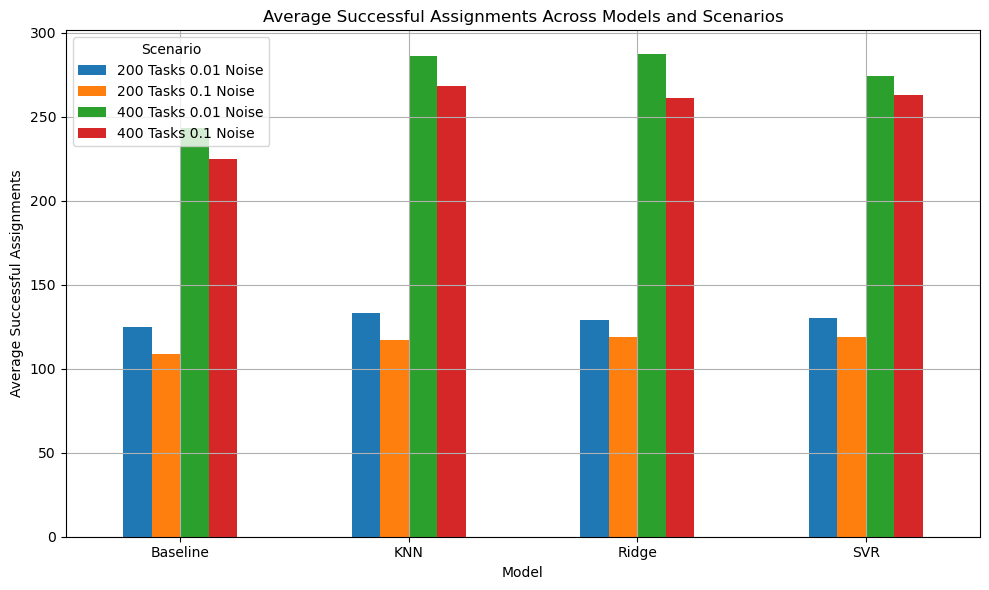

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data definition directly in a DataFrame with a simple structure
data = {
    'Model': [],
    'Scenario': [],
    'Mean Reward': [],
    'Average Successful Assignments': []
}

# Helper to add data to the structure
def add_data(model, task_count, noise_level, mean_reward, avg_assignments):
    scenario = f'{task_count} Tasks {noise_level} Noise'
    data['Model'].extend([model])
    data['Scenario'].extend([scenario])
    data['Mean Reward'].extend([mean_reward])
    data['Average Successful Assignments'].extend([avg_assignments])

# Baseline data
add_data('Baseline', 200, '0.01', 50.0, 125.0)
add_data('Baseline', 200, '0.1', 18.0, 109.0)
add_data('Baseline', 400, '0.01', 86.0, 243.0)
add_data('Baseline', 400, '0.1', 50.0, 225.0)

# Ridge data
add_data('Ridge', 200, '0.01', 58.0, 129.0)
add_data('Ridge', 200, '0.1', 38.0, 119.0)
add_data('Ridge', 400, '0.01', 174.0, 287.0)
add_data('Ridge', 400, '0.1', 122.0, 261.0)

# SVR data
add_data('SVR', 200, '0.01', 60.0, 130.0)
add_data('SVR', 200, '0.1', 38.0, 119.0)
add_data('SVR', 400, '0.01', 148.0, 274.0)
add_data('SVR', 400, '0.1', 126.0, 263.0)

# KNN data
add_data('KNN', 200, '0.01', 66.0, 133.0)
add_data('KNN', 200, '0.1', 34.0, 117.0)
add_data('KNN', 400, '0.01', 172.0, 286.0)
add_data('KNN', 400, '0.1', 136.0, 268.0)

# Convert data dictionary into DataFrame
df = pd.DataFrame(data)

# Plotting function for each metric
def plot_metric(metric):
    pivot_df = df.pivot(index='Model', columns='Scenario', values=metric)
    pivot_df.plot(kind='bar', figsize=(10, 6), rot=0)
    plt.title(f'{metric} Across Models and Scenarios')
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.legend(title='Scenario')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Generate plots
plot_metric('Mean Reward')
plot_metric('Average Successful Assignments')


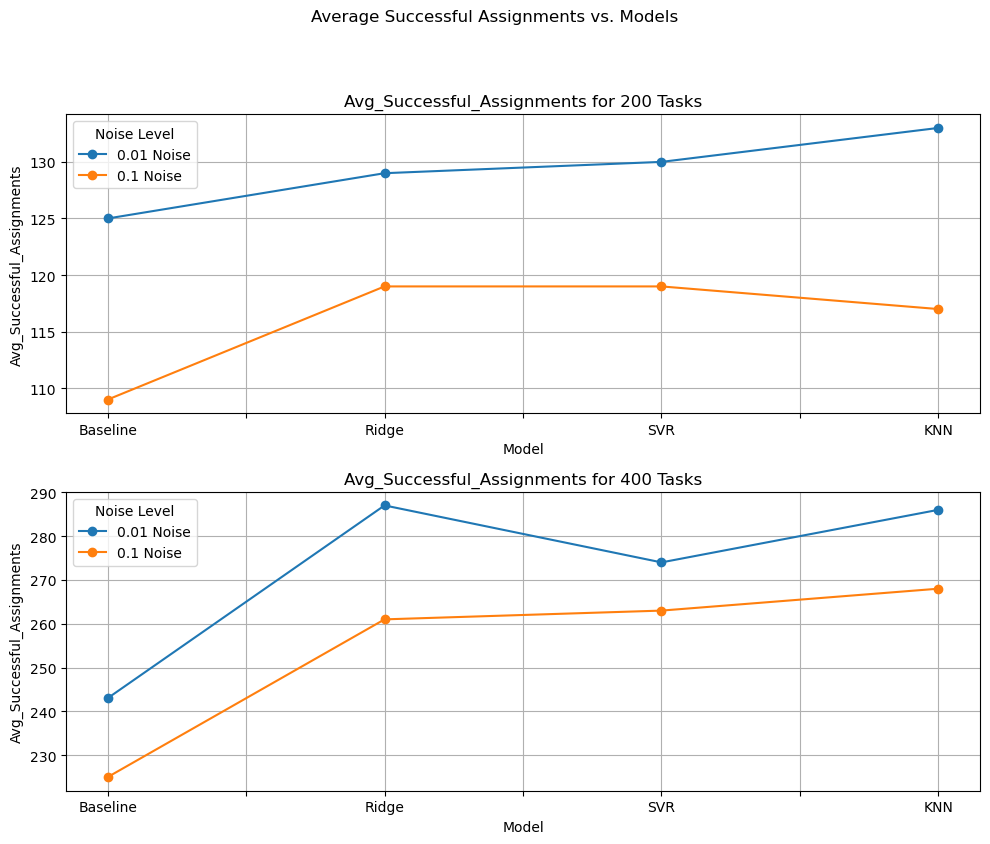

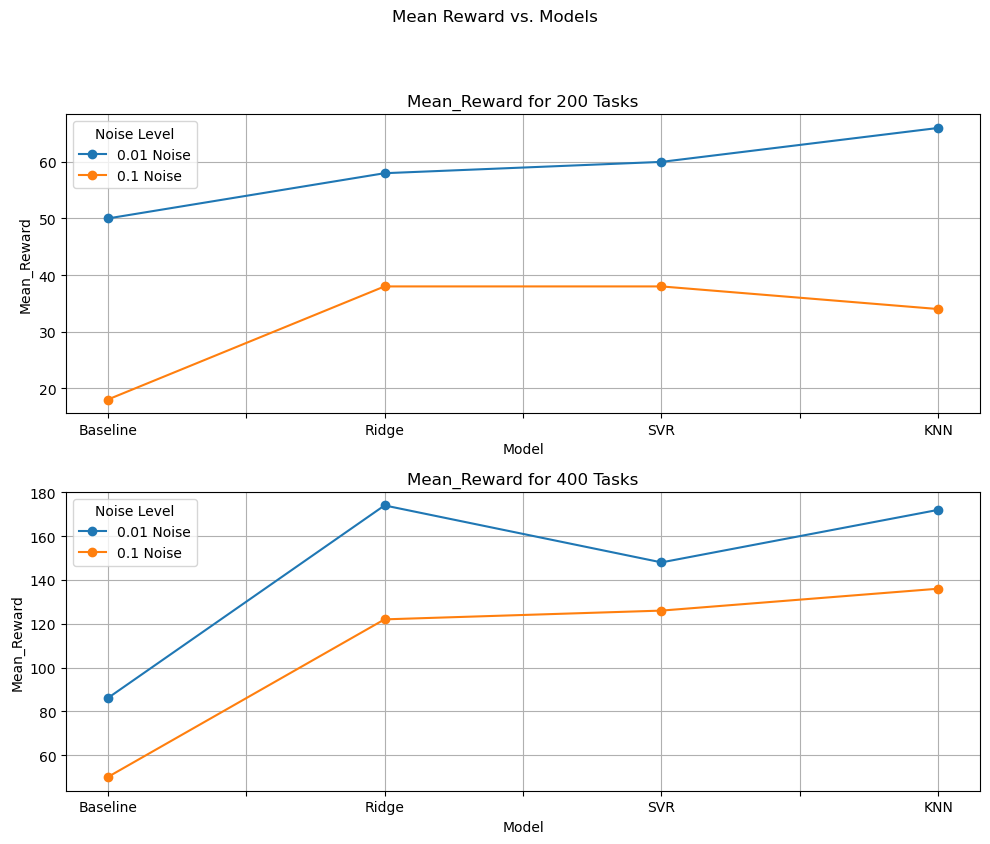

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'Model': [],
    'Task_Size': [],
    'Noise_Level': [],
    'Mean_Reward': [],
    'Avg_Successful_Assignments': []
}

# Function to add data
def add_data(model, task_size, noise_level, mean_reward, avg_assignments):
    data['Model'].append(model)
    data['Task_Size'].append(task_size)
    data['Noise_Level'].append(noise_level)
    data['Mean_Reward'].append(mean_reward)
    data['Avg_Successful_Assignments'].append(avg_assignments)

# Adding data
# Baseline
add_data('Baseline', '200 Tasks', '0.01 Noise', 50.0, 125.0)
add_data('Baseline', '200 Tasks', '0.1 Noise', 18.0, 109.0)
add_data('Baseline', '400 Tasks', '0.01 Noise', 86.0, 243.0)
add_data('Baseline', '400 Tasks', '0.1 Noise', 50.0, 225.0)

# Ridge
add_data('Ridge', '200 Tasks', '0.01 Noise', 58.0, 129.0)
add_data('Ridge', '200 Tasks', '0.1 Noise', 38.0, 119.0)
add_data('Ridge', '400 Tasks', '0.01 Noise', 174.0, 287.0)
add_data('Ridge', '400 Tasks', '0.1 Noise', 122.0, 261.0)

# SVR
add_data('SVR', '200 Tasks', '0.01 Noise', 60.0, 130.0)
add_data('SVR', '200 Tasks', '0.1 Noise', 38.0, 119.0)
add_data('SVR', '400 Tasks', '0.01 Noise', 148.0, 274.0)
add_data('SVR', '400 Tasks', '0.1 Noise', 126.0, 263.0)

# KNN
add_data('KNN', '200 Tasks', '0.01 Noise', 66.0, 133.0)
add_data('KNN', '200 Tasks', '0.1 Noise', 34.0, 117.0)
add_data('KNN', '400 Tasks', '0.01 Noise', 172.0, 286.0)
add_data('KNN', '400 Tasks', '0.1 Noise', 136.0, 268.0)

# Convert to DataFrame
df = pd.DataFrame(data)

# Plotting function
def plot_line_chart(metric, title):
    fig, axes = plt.subplots(2, 1, figsize=(10, 8))
    for ax, task_size in zip(axes, ['200 Tasks', '400 Tasks']):
        for noise_level, group in df[(df['Task_Size'] == task_size)].groupby('Noise_Level'):
            group.plot(x='Model', y=metric, ax=ax, label=noise_level, marker='o', linestyle='-')
        ax.set_title(f'{metric} for {task_size}')
        ax.set_xlabel('Model')
        ax.set_ylabel(metric)
        ax.legend(title='Noise Level')
        ax.grid(True)
    fig.suptitle(title, y=1.05)
    plt.tight_layout()
    plt.show()

# Plot assignments
plot_line_chart('Avg_Successful_Assignments', 'Average Successful Assignments vs. Models')
# Plot rewards
plot_line_chart('Mean_Reward', 'Mean Reward vs. Models')


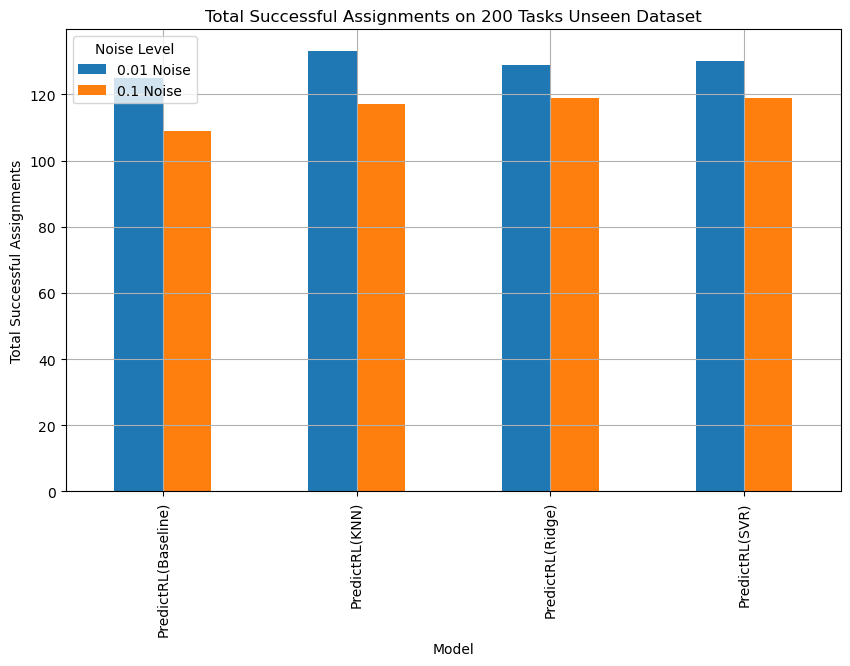

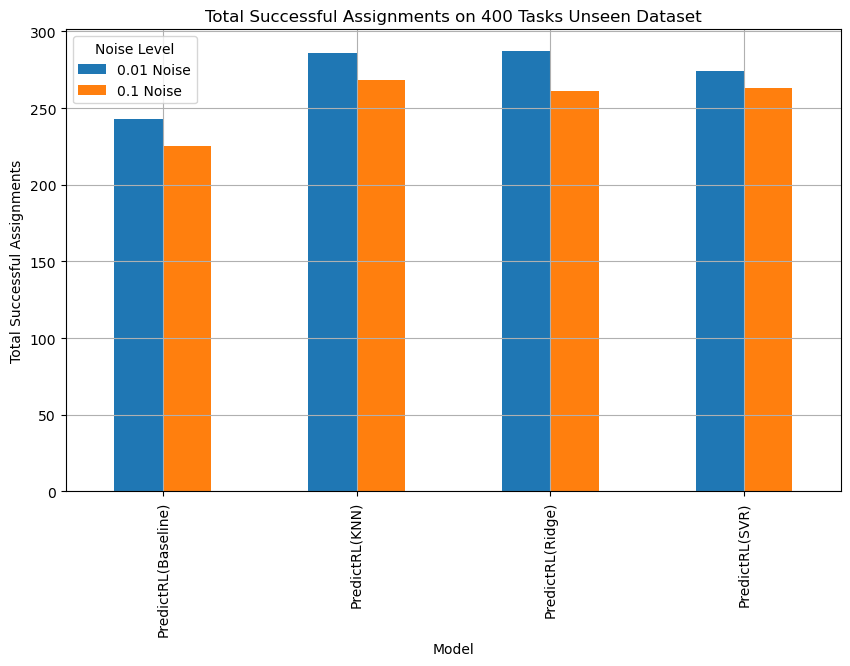

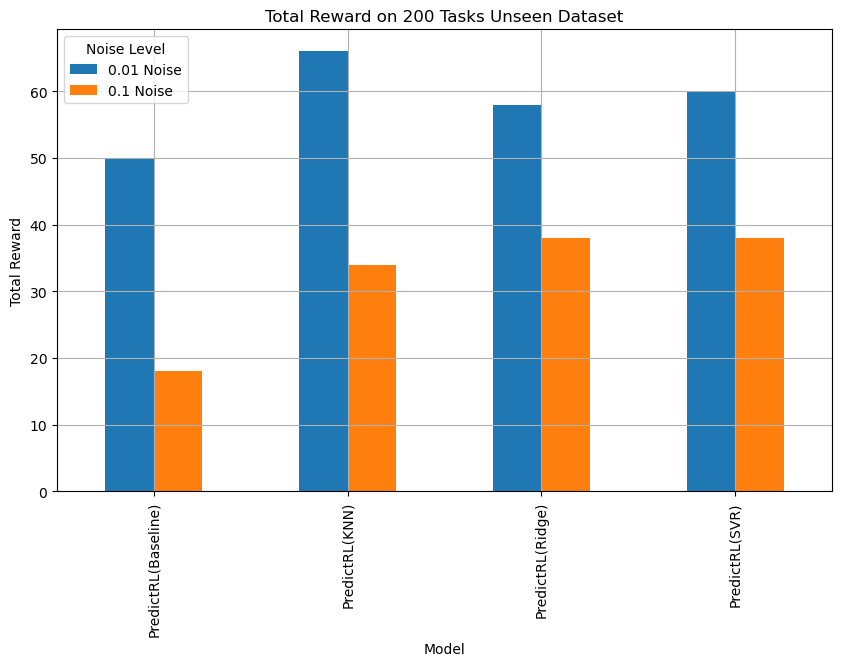

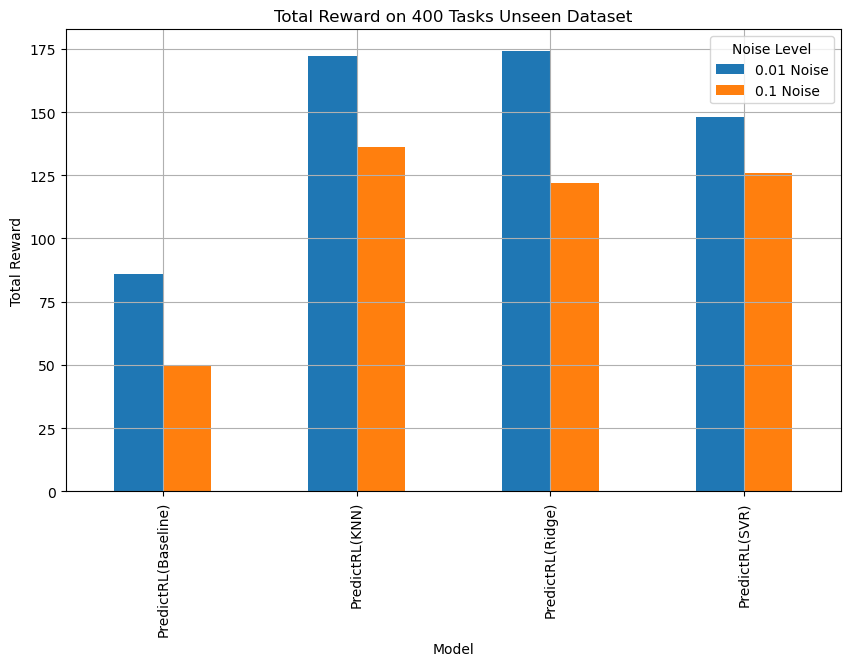

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Initialize data
data = {
    'Model': [],
    'Task_Size': [],
    'Noise_Level': [],
    'Mean_Reward': [],
    'Avg_Successful_Assignments': []
}

# Function to add data
def add_data(model, task_size, noise_level, mean_reward, avg_assignments):
    data['Model'].append(f"PredictRL({model})")
    data['Task_Size'].append(task_size)
    data['Noise_Level'].append(noise_level)
    data['Mean_Reward'].append(mean_reward)
    data['Avg_Successful_Assignments'].append(avg_assignments)

# Adding data for each model and scenario
models = ['Baseline', 'Ridge', 'SVR', 'KNN']
tasks = {'200 Tasks': ['0.01 Noise', '0.1 Noise'], '400 Tasks': ['0.01 Noise', '0.1 Noise']}
results = {
    'Baseline': [(50, 125), (18, 109), (86, 243), (50, 225)],
    'Ridge': [(58, 129), (38, 119), (174, 287), (122, 261)],
    'SVR': [(60, 130), (38, 119), (148, 274), (126, 263)],
    'KNN': [(66, 133), (34, 117), (172, 286), (136, 268)]
}

for model in models:
    idx = 0
    for task_size, noises in tasks.items():
        for noise in noises:
            mean_reward, avg_assignments = results[model][idx]
            add_data(model, task_size, noise, mean_reward, avg_assignments)
            idx += 1

# Convert to DataFrame
df = pd.DataFrame(data)

# Plotting function for bar charts
def plot_metric(metric, task_size):
    fig, ax = plt.subplots(figsize=(10, 6))
    task_data = df[df['Task_Size'] == task_size]
    pivot_data = task_data.pivot(index='Model', columns='Noise_Level', values=metric)
    pivot_data.plot(kind='bar', ax=ax)
    
    # Define the title based on the metric and task size
    title_metric = "Successful Assignments" if metric == "Avg_Successful_Assignments" else "Reward"
    title = f'Total {title_metric} on {task_size} Unseen Dataset'
    
    ax.set_title(title)
    ax.set_xlabel('Model')
    ax.set_ylabel(f'Total {title_metric}')
    ax.legend(title='Noise Level')
    ax.grid(True)
    plt.show()

# Generate plots for each combination
plot_metric('Avg_Successful_Assignments', '200 Tasks')
plot_metric('Avg_Successful_Assignments', '400 Tasks')
plot_metric('Mean_Reward', '200 Tasks')
plot_metric('Mean_Reward', '400 Tasks')
